In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',3998)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('AMEO.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.drop(['Unnamed: 0','ID','CollegeCityID','CollegeID'],axis=1,inplace=True)

In [4]:
df.shape

(3998, 35)

### Experience:

In [5]:
df['DOL'].replace({'present':'2016-01-01'},inplace=True)

In [6]:
df['DOL'] = pd.to_datetime(df['DOL'])

In [7]:
df['Exp']= (df['DOL']-df['DOJ'])
df['Exp'] = (df['Exp'] / np.timedelta64(1, 'D')).astype(int)

In [8]:
df = df.drop(df.index[[29,92,148,235,264,451,591,865,888,1005,1355,1433,1482,1522,1541,1591,1636,1992,2044,2266,2319,2349,2407,2414,2805,2889,2946,2977,3094,3095,3109,3243,3304,
                          3384,3391,3470,3593,3634,3700,3911]])   #DOJ is greater than DOL

In [9]:
df['Exp'] = round(df['Exp']/365.2425,1)

In [10]:
df.shape

(3958, 36)

### Age:

In [11]:
import datetime
df['curr_date'] = datetime.datetime(2016,1,1)

In [12]:
df['curr_date'] = pd.to_datetime(df['curr_date'])

In [13]:
df['Age'] = df['curr_date'] - df['DOB']
df['Age'] = (df['Age'] / np.timedelta64(1, 'D')).astype(int)

In [14]:
df['Age'] = round(df['Age']/365.2425,0)

In [15]:
df = df.drop(['DOJ','DOL','DOB','curr_date'],axis=1)

### JobCity:

In [16]:
len(df['JobCity'].value_counts())

338

In [17]:
df["JobCity"]=df['JobCity'].str.upper()

In [18]:
df['JobCity'] = df["JobCity"].replace({'AMBALA CITY':'AMBALA','A-64,SEC-64,NOIDA':'GREATER NOIDA','BANGALORE ':'BANGALORE','BENGALURU':'BANGALORE','BANGLORE':'BANGALORE','BANAGLORE':'BANGALORE','BANGLORE':'BANGALORE',
                                           'ASIFABADBANGLORE':'BANGALORE',' BANGALORE':'BANGALORE','BHOPAL ':'BHOPAL','BHUBANESHWAR':'BHUBANESWAR',
                                          'BHUBANESWAR ':'BHUBANESWAR','BHUBNESHWAR':'BHUBANESWAR','CHANDIGARH ':'CHANDIGARH','CHENNAI ':'CHENNAI','CHENNAI & MUMBAI':'CHENNAI',
                                          'CHENNAI, BANGALORE':'CHENNAI','DELHI/NCR':'DELHI','GAJIABAAD':'GHAZIABAAD','GAZIABAAD':'GHAZIABAAD','GHAZIABAD':'GHAZIABAAD','INDIRAPURAM, GHAZIABAD':'GHAZIABAAD','GANDHI NAGAR':'GANDHINAGAR',
                                          'GANDHINAGAR ':'GANDHINAGAR','GURGA':'GURGAON','GURGAON ':'GURGAON','GURAGAON':'GURGAON','GURGOAN':'GURGAON','HARYANA':'CHANDIGARH','HDERABAD':'HYDERABAD','HYDERABAD ':'HYDERABAD',
                                          'HYDERABAD(BHADURPALLY)':'HYDERABAD','JAIPUR ':'JAIPUR','KANPUR ':'KANPUR','KERAL':'THIRUVANANTHAPURAM','KOCHI/COCHIN':'KOCHI',
                                           'KOCHI/COCHIN, CHENNAI AND COIMBATORE':'KOCHI','KOLKATA ':'KOLKATA','KOLKATA`':'KOLKATA','LUCKNOW ':'LUCKNOW',
                                           'MADURAI ':'MADURAI','MUMBAI ':'MUMBAI','MYSORE ':'MYSORE','NAGPUR ':'NAGPUR','NASIKCITY':'NASHIK','NAVI MUMBAI':'MUMBAI',
                                           'NAVI MUMBAI , HYDERABAD':'MUMBAI','NCR':'DELHI','NEW DELHI':'DELHI','NEW DELHI ':'DELHI','NEW DEHLI':'DELHI',
                                          'NEW DELHI - JAISALMER':'NEW DELHI','NOIDA ':'NOIDA','ORISSA':'BHUBANESWAR','PANCHKULA ':'PANCHKULA','PUNCHKULA':'PANCHKULA','PONDI':'PONDICHERRY',
                                          'PONDY':'PONDICHERRY','PUNR':'PUNE','PUNE ':'PUNE','RANCHI ':'RANCHI','SILIGURI ':'SILIGURI','TRIVANDRUM ':'TRIVANDRUM',
                                          'VISAKHAPATNAM':'VIZAG','VSAKHAPTTNAM':'VIZAG',' MUMBAI':'MUMBAI',' PUNE':'PUNE',' DELHI':'DELHI',' CHENNAI':'CHENNAI','BANAGALORE':'BANGALORE','RAJASTHAN':'JAIPUR','TIRUPATHI':'TIRUPATI',
                                      'BIHAR':'PATNA','MUZAFFARPUR':'MUZZAFARPUR','SONIPAT':'SONEPAT'})

In [19]:
len(df['JobCity'].value_counts())

188

### 10th Board:

In [20]:
df['10board'].replace({'central board of secondary education':'cbse','ssc':'state board','up board':'state board',
                       'matriculation':'state board','rbse':'state board','board of secondary education':'state board',
                       'up':'state board','mp board':'state board','wbbse':'state board','sslc':'state board','kseeb':'state board',
                       'upboard':'state board','maharashtra state board':'state board','karnataka state board':'state board',
                       'state':'state board','bseb':'state board','maharashtra board':'state board','pseb':'state board',
                       'uttar pradesh board':'state board','bse':'state board','karnataka secondary education board':'state board',
                       'karnataka secondary education examination board':'state board','hbse':'state board','rajasthan board':'state board',
                       'gseb':'state board','u p board':'state board','west bengal board of secondary education':'state board',
                       'matriculation board':'state board','mp':'state board','bseb,patna':'state board',
                       'secondary school of education':'state board','uttarakhand board':'state board','bse,orissa':'state board',
                       'anglo indian':'state board','maharashtra':'state board','hbsc':'state board',
                       'rajasthan board of secondary education':'state board','bihar board':'state board',
                       'board of secondary education,ap':'state board','jkbose':'state board','board of school education harayana':'state board',
                       'hse':'state board','kerala state board':'state board','mpboard':'state board','mp board bhopal':'state board',
                       'karnataka board':'state board','board of secondary education,andhra pradesh':'state board',
                       'board of secondary education, rajasthan':'state board','pune':'state board','matric board':'state board',
                       'bihar school examination board':'state board','board of secondary education, andhra pradesh':'state board',
                       'karnataka state secondary education board':'state board','karnataka secondary education':'state board',
                       'nagpur':'state board','mpbse':'state board','bseb, patna':'state board','karnataka':'state board',
                       'latur':'state board','sslc board':'state board','tamilnadu state board':'state board','kseb':'state board',
                       'hsc':'state board','bse, odisha':'state board','cbse board':'cbse','jseb':'state board',
                       'andhra pradesh state board':'state board','jawahar navodaya vidyalaya':'state board',
                       'tamilnadu matriculation board':'state board','j & k bord':'state board',
                       'uttaranchal state board':'state board','mhsbse':'state board','jbse,jharkhand':'state board',
                       'council for indian school certificate examination':'state board',
                       'state board - west bengal board of secondary education : wbbse':'state board','karnataka secondary school of examination':'state board',
                       'gsheb':'state board','up board,allahabad':'state board','dav public school sec 14':'state board',
                       'nashik board':'state board','secondary education board of rajasthan':'state board','board of secondary education(bse) orissa':'state board',
                       'state board (jac, ranchi)':'state board','u p':'state board','karnataka education board (keeb)':'state board',
                       'bseb ,patna':'state board','maharashtra sate board':'state board','karnataka sslc board bangalore':'state board',
                       'ksseb(karnataka state board)':'state board','ua':'state board','board of intermediate education':'state board',
                       'ssc regular':'state board','mumbai board':'state board','state borad hp':'state board','ghseb':'state board',
                       'sarada high scchool':'state board','ap state board':'state board','rajasthan board ajmer':'state board',
                       'cgbse raipur':'state board','hsce':'state board','little jacky matric higher secondary school':'state board',
                       'karnataka education board':'state board','gujarat board':'state board','gyan bharati school':'state board',
                       'karnataka board of higher education':'state board','ms board':'state board','bsepatna':'state board',
                       'kiran english medium high school':'state board','uttrakhand board':'state board',
                       'dav public school,hehal':'state board','board of school education uttarakhand':'state board',
                       'up board , allahabad':'state board','delhi public school':'cbse','nagpur board':'state board',
                       'maharashtra satate board':'state board','mirza ahmed ali baig':'state board',
                       'haryana board of school education':'state board','board of high school and intermediate education uttarpradesh':'state board',
                       'pune board':'state board','bihar secondary education board,patna':'state board',
                       'ap state board for secondary education':'state board','board of secondary education - andhra pradesh':'state board',
                       'nasik':'state board','jharkhand secondary examination board,ranchi':'state board',
                       'ssc maharashtra board':'state board','board of secondary education orissa':'state board',
                       'central board of secondary education, new delhi':'cbse','wbbsce':'state board','bse,odisha':'state board',
                       'board of secondary education (bse) orissa':'state board','west bengal board of secondary eucation':'state board',
                       'maharashtra state(latur board)':'state board','nagpur board,nagpur':'state board','karnataka state examination board':'state board',
                       'icse board , new delhi':'icse','aurangabad board':'state board','maharashtra nasik board':'state board',
                       'up bourd':'state board','karantaka secondary education and examination borad':'state board','sslc,karnataka':'state board',
                       'board of secondary education,orissa':'state board','maharashtra state board mumbai divisional board':'state board',
                       'sslc,karnataka':'state board','board of secondary education,orissa':'state board','maharashtra state board mumbai divisional board':'state board',
                       'secondary school cerfificate':'state board','mp state board':'state board','delhi board':'state board','kerala state technical education':'state board',
                       'board of secondary education,rajasthan(rbse)':'state board','state board of secondary education, ap':'state board',
                       'kolhapur divisional board, maharashtra':'state board','ksbe':'state board',
'jharkhand academic council':'state board',
'maharashtra state board for ssc':'state board', 
'bsc,orissa':'state board',
'bse(board of secondary education)':'state board',
'j&k state board of school education':'state board', 
'state board of secondary education,andhra pradesh':'state board',
'state board of karnataka':'state board',
'secondary school certificate':'state board',
'msbshse,pune':'state board',
'state(karnataka board)':'state board',
'state board ':'state board',
'apsche':'state board',
'himachal pradesh board':'state board',
'ssc board of andrapradesh':'state board',
'icse board':'state board',
'himachal pradesh board of school education':'state board',
'rbse,ajmer':'state board', 
'education board of kerala':'state board',
'apssc':'state board',
'bharathi matriculation school':'state board',
'gujarat state board':'state board',
'stmary higher secondary':'state board',
'maharashtra state board,pune':'state board',
'cbse[gulf zone]':'cbse',
'kerala university':'state board',
'up(allahabad)':'state board',
'board of secondary education,andhara pradesh':'state board',
'karnataka secondary eduction':'state board',
'latur board':'state board',
'ssc-andhra pradesh':'state board',
'national public school':'state board',
'tamil nadu state':'state board',
'stjosephs girls higher sec school,dindigul':'state board',
'board ofsecondary education,ap':'state board',
'karnataka board of secondary education':'state board',
'bihar examination board, patna':'state board',
'board of secondaray education':'state board',
'state board of secondary education( ssc)':'state board',
'jharkhand acedemic council':'state board',
'seba(assam)':'state board',
'nagpur divisional board':'state board',
'maharashtra state board of secondary & higher secondary education':'state board',
'hse,board':'state board',
'cicse':'state board',
'maharastra board':'state board',
'west bengal  board of secondary education':'state board',
'kseeb(karnataka secondary education examination board)':'state board',
'metric':'state board',
'uttaranchal shiksha avam pariksha parishad':'state board',
'maharashtra state boar of secondary and higher secondary education':'state board',
'board of secondary education,odisha':'state board',
'cgbse':'state board',
'holy cross matriculation hr sec school':'state board',
'sss pune':'state board',
'west bengal board of secondary examination (wbbse)':'state board',
'up-board':'state board',
'andhra pradesh board ssc':'state board',
'uttranchal board':'state board',
'jharkhand secondary education board':'state board',
'maharashtra board, pune':'state board',
'don bosco maatriculation school':'state board',
'haryana board of school education,(hbse)':'state board',
'bihar school examination board patna':'state board',
'biharboard':'state board',
'board of school education haryana':'state board',
'up baord':'state board',
'bsemp':'state board',
'seba':'state board',
'kerala':'state board',
'cbsc':'cbse',
'kalaimagal matriculation higher secondary school':'state board',
'madhya pradesh board':'state board',
'up bord':'state board',
'secondary board of rajasthan':'state board',
'board of ssc education andhra pradesh':'state board',
'karnataka secondory education board':'state board',
'kolhapur':'state board',
'bihar':'state board',
'sri kannika parameswari highier secondary school, udumalpet':'state board',
'kea':'state board',
'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'state board',
'cbse ':'cbse',
'board of secondary education rajasthan':'state board',
'school secondary education, andhra pradesh':'state board',
'bright way college, (up board)':'state board',
'certificate of middle years program of ib':'state board',
'upbhsie':'state board',
'cluny':'state board',
'jharkhand accademic council':'state board',
'aisse':'state board',
'hse,orissa':'state board',
'maharashtra state board pune':'state board',
'rbse (state board)':'state board',
'karnataka secondary board':'state board',
'tn state board':'state board',
'board of  secondary education':'state board',
'maharashtra state board of secondary and higher secondary education,pune':'state board',
'up board allahabad':'state board',
'maharashtra state board of secondary and higher secondary education':'state board',
'jharkhand secondary examination board (ranchi)':'state board',
'board of secondary school education':'state board',
'secondary state certificate':'state board',
"stmary's convent inter college":"state board",
'jharkhand secondary board':'state board',
'state bord':'state board',
'maticulation':'state board',
'mp-bse':'state board',
'secondary school education':'state board',
'bseb patna':'state board',
'state board of secondary education, andhra pradesh':'state board',
'punjab school education board, mohali':'state board',
'ksseb':'state board',
'stateboard':'state board',
'uttar pradesh':'state board',
'matric':'state board',
'board of ssc':'state board',
'board of secendary education orissa':'state board',
'board secondary  education':'state board',
'state boardmp board ':'state board',
'up borad':'state board',
'karnataka state education examination board':'state board'},inplace=True)

In [21]:
df['10board'].value_counts()

state board    1930
cbse           1399
0               350
icse            279
Name: 10board, dtype: int64

### 12th Board:

In [22]:
df['12board'].replace({'icse':'isc','board of intermediate':'state board','board of intermediate education':'state board',
                     'up':'state board','rbse':'state board','mp board':'state board','bie':'state board',
                      'chse':'state board','ipe':'state board','hsc':'state board','central board of secondary education':'cbse',
                      'maharashtra state board':'state board','wbchse':'state board','maharashtra board':'state board',
                      'puc':'state board','matriculation':'state board','hbse':'state board','state':'state board',
                      'upboard':'state board','nios':'cbse','uttar pradesh board':'state board','board of intermediate education,ap':'state board',
                      'stateboard':'state board','bseb':'state board','pseb':'state board','ssc':'state board','karnataka state board':'state board',
                     'rajasthan board':'state board','u p board':'state board','west bengal council of higher secondary education':'state board',
                      'msbte':'state board','biec,patna':'state board','intermediate board':'state board','chse,orissa':'state board',
                      'karnataka pre university board':'state board','bieap':'state board','mp':'state board','uttarakhand board':'state board',
                      'uttar pradesh':'state board','sbtet':'state board','karnataka pre-university board':'state board','jharkhand academic council':'state board',
                      'bihar intermediate education council':'state board','board of intermediate education, andhra pradesh':'state board',
                     'pre-university':'state board','karnataka pu board':'state board','board of intermediate education, ap':'state board',
                      'maharashtra':'state board','department of pre-university education':'state board','pre university board':'state board',
                      'biec':'state board','apbie':'state board','kerala state board':'state board','tamilnadu state board':'state board',
                      'board of secondary education rajasthan':'state board','jkbose':'state board','pue':'state board','chse,odisha':'state board',
                      'pre-university board':'state board','wbbhse':'state board','tamil nadu state board':'state board','rajasthan board of secondary education':'state board',
                      'bihar board':'state board','ghseb':'state board','latur':'state board','karnataka board':'state board','nagpur':'state board',
                     'gsheb':'state board','bte up':'state board','kea':'state board',' board of intermediate':'state board',
                    'board of intermediate ap':'state board','board of intermediate education,andhra pradesh':'state board',
                      'ibe':'state board','mpbse':'state board','state board of technical education':'state board','certificate for higher secondary education (chse)orissa':'state board',
                      'latur board':'state board','tamilnadu stateboard':'state board','st joseph hr sec school':'state board',
                      'tn state board':'state board','andhpradesh board of intermediate education':'state board','uttaranchal shiksha avam pariksha parishad':'state board',
                      'board of secondary education, rajasthan':'state board','board of intermediate education,andra pradesh':'state board',
                      ' upboard':'state board','msbshse,pune':'state board','nagpur board,nagpur':'state board','kolhapur divisional board, maharashtra':'state board',
                      'tamil nadu state':'state board','karnataka pre-university':'state board','ks rangasamy institute of technology':'state board',
                      'board of intermidiate':'state board','mbose':'state board','board of intermediate education:ap,hyderabad':'state board',
                      'intermidiate':'state board','holy cross matriculation hr sec school':'state board','state board of technical education harayana':'state board',
                     'bice':'state board','secnior secondary education board of rajasthan':'state board','bte,delhi':'state board',
                      'maharashtra state board of secondary & higher secondary education':'state board','gseb':'state board','mpboard':'state board',
                      'andhra board':'state board','haryana state board of technical education chandigarh':'state board','karnataka board of university':'state board',
                       'intermideate':'state board','jharkhand acamedic council (ranchi)':'state board','science college':'state board','uo board':'state board',
                      'central board of secondary education, new delhi':'cbse','himachal pradesh board':'state board',
                      'board of technicaleducation ,delhi':'state board','board of technical education':'state board',
                      'karnataka state examination board':'state board','dav public school sec 14':'state board','board of high school and intermediate education uttarpradesh':'state board',
                      'ap board':'state board','board of higher secondary orissa':'state board','apsb':'state board','ap intermediate board':'state board',
                      'karnataka secondary education board':'state board','sri kannika parameswari highier secondary school, udumalpet':'state board',
                      'west bengal state council of technical education':'state board','higher secondary':'state board','hse':'state board','jawahar higher secondary school':'state board',
                      'karnataka sslc':'state board','uttranchal board':'state board','karnataka state pre- university board':'state board',
                      'maharashtra state(latur board)':'state board','bihar school examination board patna':'state board','puboard':'state board',
                      'department of pre-university eduction':'state board','scte & vt (diploma)':'state board','state board (jac, ranchi)':'state board',
                      'board of secondary education':'state board','all india board':'state board','maharashtra state boar of secondary and higher secondary education':'state board',
                      'mpc':'state board','scte and vt ,orissa':'state board','gujarat board':'state board','up baord':'state board','pu  board karnataka':'state board',
                      'karnataka state':'state board','bihar':'state board','stmiras college for girls':'state board','pu board ,karnataka':'state board',
                      'board of secondary education,rajasthan(rbse)':'state board','kolhapur':'state board','lucknow public college':'state board',
                      'up bourd':'state board','dte':'state board','j & k board':'state board','apbsc':'state board','pre university board, karnataka':'state board',
                      'state board - tamilnadu':'state board','karnatak pu board':'state board','maharashtra board, pune':'state board','karnataka pre unversity board':'state board',
                      'hsc maharashtra board':'state board','state  board of intermediate education, andhra pradesh':'state board',
                     'j&k state board of school education':'state board','pu':'state board','state broad':'state board','jharkhand acedemic council':'state board',
                       'higher secondary state certificate':'state board','pre university board of karnataka':'state board',
    'karanataka secondary board':'state board','srv girls higher sec school,rasipuram':'state board','up board allahabad':'state board',
                   'diploma ( maharashtra state board of technical education)':'state board','sri sankara vidyalaya':'state board',
                       'department of pre-university education, bangalore':'state board','uttaranchal state board':'state board',
                       'cgbse':'cbse','kerala state hse board':'state board','aissce':'state board','msbte (diploma in computer technology)':'state board',
                       
                'chse(concil of higher secondary education)':'state board','maharashtra nasik board':'state board','jiec':'state board',
                       'kerala university':'state board','preuniversity board(karnataka)':'state board','gshseb':'state board','hsc pune':'state board',
                       'uttrakhand board':'state board','maharashtra satate board':'state board','cgbse raipur':'state board','jharkhand accademic council':'state board',
                       'nagpur divisional board':'state board','nasik':'state board','borad of intermediate':'state board','technical board, punchkula':'state board',
                       'jaycee matriculation school':'state board','chse, odisha':'state board','intermedite':'state board','board of intermidiate examination':'state board',
                       'hslc (tamil nadu state board)':'state board','matric board':'state board','higher secondary education':'state board',
                       'tamilnadu higher secondary education board':'state board','state board - west bengal council of higher secondary education : wbchse':'state board',
                       'intermediate board of education':'state board','state syllabus':'state board','dpue':'state board','department of technical education':'state board',
                       'board of school education uttarakhand':'state board','state board of karnataka':'state board','jharkhand board':'state board',
                       'board of school education harayana':'state board','intermediate board of education,andhra pradesh':'state board','nashik board':'state board',
                       'west bengal board of higher secondary education':'state board','jstb,jharkhand':'state board','pune board':'state board',
                       'chsc':'state board','up(allahabad)':'state board','cbse board':'cbse','west bengal council of higher secondary eucation':'state board',
                       'scte vt orissa':'state board','madhya pradesh board':'state board','bsemp':'state board','aurangabad board':'state board',
                       'aligarh muslim university':'state board','gseb/technical education board':'state board','dav public school':'cbse',
                       'biec, patna':'state board','electonincs and communication(dote)':'state board','amravati divisional board':'state board',
                       'karnataka pu':'state board','diploma in engg (e &tc) tilak maharashtra vidayapeeth':'state board','punjab state board of technical education & industrial training, chandigarh':'state board',
                       'ua':'state board','pub':'state board','board of intermediate(bie)':'state board','jyoti nivas':'state board','board of secondary school of education':'state board',
                       'msbte pune':'state board','secondary board of rajasthan':'state board','bseb, patna':'state board','mp board bhopal':'state board',
                       'tamil nadu polytechnic':'state board','ms board':'state board','jaswant modern school':'state board','punjab state board of technical education & industrial training':'state board',
                       'stateboard/tamil nadu':'state board','cbsc':'cbse','department of pre university education':'state board',
                       'karnataka education board':'state board','ssm srsecschool':'state board','sbte, jharkhand':'state board',
                       'government polytechnic mumbai , mumbai board':'state board','diploma(msbte)':'state board','kerala':'state board',
                       'baord of intermediate education':'state board','cicse':'state board','sda matric higher secondary school':'state board',
                       'international baccalaureate (ib) diploma':'state board','hbsc':'state board','psbte':'state board','p u board, karnataka':'state board',
                       'sjrcw':'state board','state bord':'state board','intermediate board of andhra pardesh':'state board',
                       'isce':'isc','maharashtra state board mumbai divisional board':'state board','hisher seconadry examination(state board)':'state board',
                       'ahsec':'state board','dav public school,hehal':'cbse','board of intermidiate education,ap':'state board',
                       'state board of technical education and training':'state board','karnataka board secondary education':'state board',
                       'biec-patna':'state board','bihar intermediate education council, patna':'state board','bright way college, (up board)':'state board',
                       'boardofintermediate':'state board','council for indian school certificate examination':'isc','cbese':'state board',
                       'biec patna':'state board','intermediate board examination':'state board','isc board , new delhi':'isc',
                       'board of intrmediate education,ap':'state board','cbse,new delhi':'cbse','sri chaitanya junior kalasala':'state board',
                       'intermediate state board':'state board','dote (diploma - computer engg)':'state board','narayana junior college':'state board',
                       's j polytechnic':'state board','department of technical education, bangalore':'state board','madhya pradesh open school':'state board',
                       'mp-bse':'state board','board of intermediate,ap':'state board','karnataka secondary education':'state board','board of intermeadiate education':'state board',
                       'bteup':'state board','pu board karnataka':'state board','staae board':'state board','maharashtra state board for hsc':'state board',
                       'ap board for intermediate education':'state board','dept of pre-university education':'state board','diploma in computers':'state board',
                       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'state board','rajasthan board ajmer':'state board',
                    'upbhsie':'state board','board of intermediate education,hyderabad':'state board','andhra pradesh board of secondary education':'state board',
                       'intermediate council patna':'state board','govt of karnataka department of pre-university education':'state board',
                    'board of intmediate education ap':'state board','rbse (state board)':'state board','andhra pradesh':'state board',
                       'wbscte':'state board','board fo intermediate education, ap':'state board','up board,allahabad':'state board',
                       'pre university':'state board','department of pre-university education(government of karnataka)':'state board',
                       'west bengal council of higher secondary examination (wbchse)':'state board','directorate of technical education,banglore':'state board',
                       'scte&vt':'state board','state board':'state board','up-board':'state board','up board , allahabad':'state board',
                       'isc board':'isc','nagpur board':'state board','andhra pradesh state board':'state board','state board of technical eduction panchkula':'state board',
                       'u p':'state board',
                      'up board':'state board',
                      'intermediate':'state board',
                      'pu board':'state board','himachal pradesh board of school education':'state board',
                       'board of higher secondary examination, kerala':'state board',
                       'state board ':'state board','bciec,patna':'state board','up bord':'state board'
                      },inplace=True)
                       

In [23]:
df['12board'].value_counts()

state board    2013
cbse           1409
0               359
isc             177
Name: 12board, dtype: int64

### Specialization:

In [24]:
len(df['Specialization'].value_counts())

46

In [25]:
df['Specialization'].replace({
'electronics and communication engineering' : 'TelecomEngg',
 'computer science & engineering' : 'ComputerScience',
 'information technology' : 'ComputerProgramming' ,
 'computer engineering' : 'ComputerProgramming',
 'computer application' : 'ComputerScience',
 'mechanical engineering' : 'MechanicalEngg',
 'electronics and electrical engineering' : 'ElectronicsAndSemicon',
 'electronics & telecommunications' : 'TelecomEngg',
 'electrical engineering' : 'ElectricalEngg',
 'electronics & instrumentation eng' : 'ElectronicsAndSemicon',
 'civil engineering' : 'CivilEngg',
 'electronics and instrumentation engineering' : 'ElectronicsAndSemicon',
 'information science engineering' : 'ComputerScience',
 'instrumentation and control engineering' : 'ElectronicsAndSemicon',
 'electronics engineering' : 'ElectronicsAndSemicon',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'ElectronicsAndSemicon',
 'computer science and technology' : 'ComputerScience',
 'telecommunication engineering' : 'TelecomEngg',
 'mechanical and automation' : 'MechanicalEngg',
 'automobile/automotive engineering' : 'MechanicalEngg',
 'instrumentation engineering' : 'ElectronicsAndSemicon',
 'mechatronics' : 'MechanicalEngg',
 'electronics and computer engineering' : 'ComputerProgramming',
 'aeronautical engineering' : 'MechanicalEngg',
 'computer science' : 'ComputerScience',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'ElectronicsAndSemicon',
 'electrical and power engineering' : 'ElectricalEngg',
 'industrial & management engineering' : 'other',
 'computer networking' : 'ComputerProgramming',
 'embedded systems technology' : 'ElectronicsAndSemicon',
 'power systems and automation' : 'ElectricalEngg',
 'computer and communication engineering' : 'ComputerProgramming',
 'information science' : 'ComputerScience',
 'internal combustion engine' : 'MechanicalEngg',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'MechanicalEngg',
 'control and instrumentation engineering' : 'ElectronicsAndSemicon',
 'polymer technology' : 'other',
 'electronics' : 'ElectronicsAndSemicon'},inplace=True)

In [26]:
len(df['Specialization'].value_counts())

8

### College GPA:

In [27]:
a = [lambda x:x*9.5 if x<10 else x]
df['collegeGPA'] = df['collegeGPA'].apply(a)

### Domain:

In [28]:
df['ComputerProgramming'].replace(-1,0,inplace=True),
df['ElectronicsAndSemicon'].replace(-1,0,inplace=True),
df['ComputerScience'].replace(-1,0,inplace=True),
df['MechanicalEngg'].replace(-1,0,inplace=True),
df['ElectricalEngg'].replace(-1,0,inplace=True),
df['TelecomEngg'].replace(-1,0,inplace=True),
df['CivilEngg'].replace(-1,0,inplace=True)

In [29]:
df['Score'] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']].max(axis=1)

In [30]:
df[['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','Score']].head()

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Score
0,445,0,0,0,0,0,0,445
1,0,466,0,0,0,0,0,466
2,395,0,0,0,0,0,0,395
3,615,0,0,0,0,0,0,615
4,0,233,0,0,0,0,0,233


In [31]:
df['Max'] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']].idxmax(axis=1)

In [32]:
df['CP'] = np.where(df['Max']=='ComputerProgramming',1,0)
df['ES'] = np.where(df['Max']=='ElectronicsAndSemicon',1,0)
df['CS'] = np.where(df['Max']=='ComputerScience',1,0)
df['ME'] = np.where(df['Max']=='MechanicalEngg',1,0)
df['EE'] = np.where(df['Max']=='ElectricalEngg',1,0)
df['TE'] = np.where(df['Max']=='TelecomEngg',1,0)
df['CE'] = np.where(df['Max']=='CivilEngg',1,0)

In [33]:
df.drop(['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg'],axis=1,inplace=True)

In [34]:
#for i in df[['Salary','10percentage','12percentage','collegeGPA','English', 'Logical', 'Quant', 'Domain','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       #'openess_to_experience', 'Exp', 'Age', 'Score']]:
    #sns.distplot(df[i])
    #plt.show()

In [35]:
#import scipy.stats
#scipy.stats.boxcox(df['10percentage'],lmbda=None, alpha=None)

In [36]:
df.head()

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp,Age,Score,Max,CP,ES,CS,ME,EE,TE,CE
0,420000,senior quality engineer,BANGALORE,f,84.3,state board,2007,95.8,state board,2,B.Tech/B.E.,ComputerProgramming,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,3.6,26.0,445,ComputerProgramming,1,0,0,0,0,0,0
1,500000,assistant manager,INDORE,m,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,TelecomEngg,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.3,26.0,466,ElectronicsAndSemicon,0,1,0,0,0,0,0
2,325000,systems engineer,CHENNAI,f,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,ComputerProgramming,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,1.6,23.0,395,ComputerProgramming,1,0,0,0,0,0,0
3,1100000,senior software engineer,GURGAON,m,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,ComputerProgramming,74.64,1,Delhi,2011,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4.5,26.0,615,ComputerProgramming,1,0,0,0,0,0,0
4,200000,get,MANESAR,m,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,TelecomEngg,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,25.0,233,ElectronicsAndSemicon,0,1,0,0,0,0,0


# Univariate:

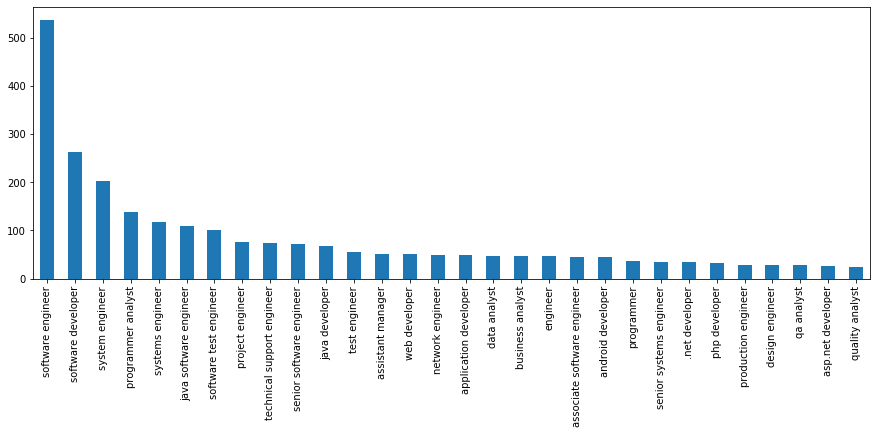

In [37]:
df['Designation'].value_counts().head(30).plot(x='Designation',y='Number of persons',kind='bar',figsize=(15,5))

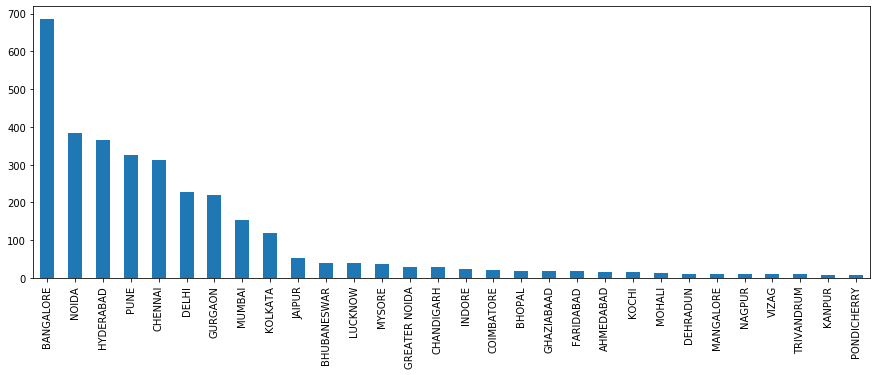

In [38]:
df['JobCity'].value_counts().head(30).plot(x='City',y='Number of persons',kind='bar',figsize=(15,5))

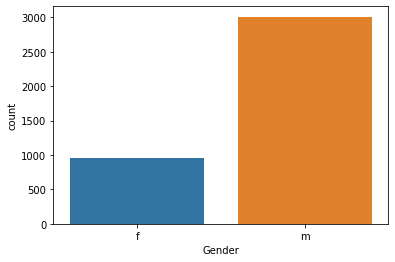

In [39]:
sns.countplot(df['Gender'])

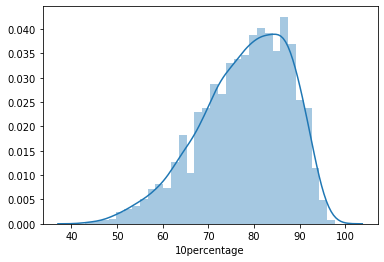

In [40]:
sns.distplot(df['10percentage'])

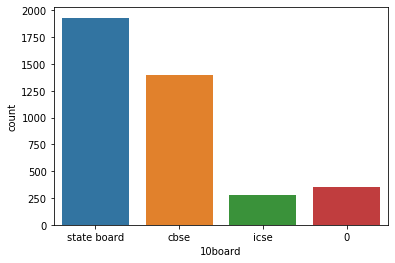

In [41]:
sns.countplot(df['10board'])

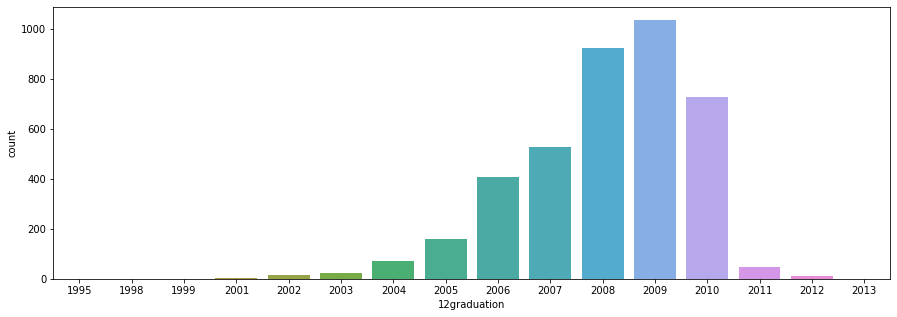

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df['12graduation'])

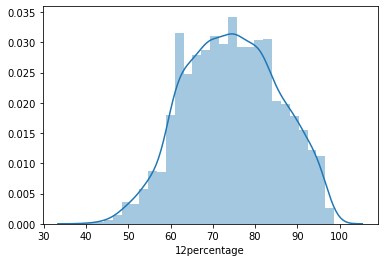

In [43]:
sns.distplot(df['12percentage'])

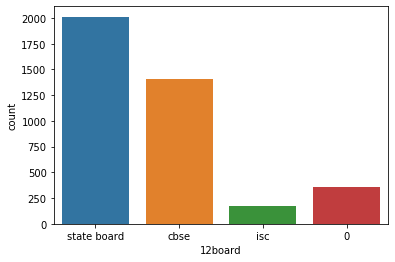

In [44]:
sns.countplot(df['12board'])

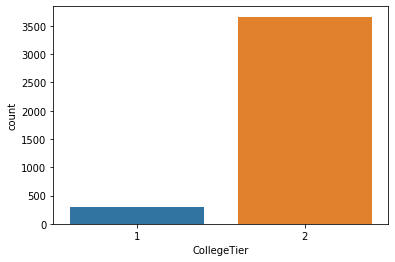

In [45]:
sns.countplot(df['CollegeTier'])

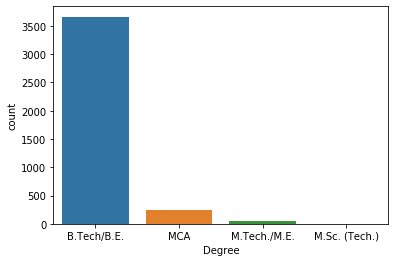

In [46]:
sns.countplot(df['Degree'])

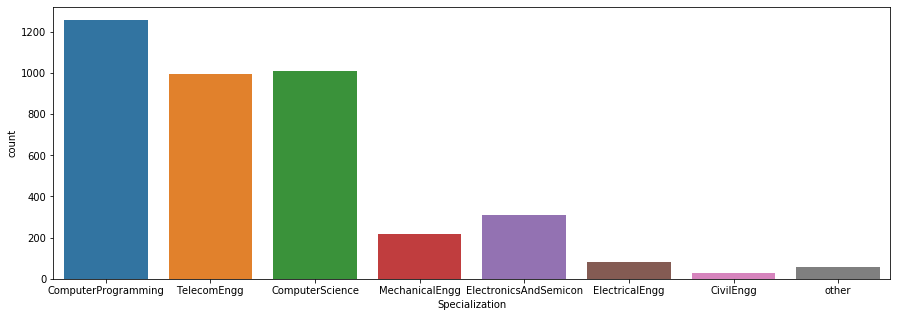

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(df['Specialization'])

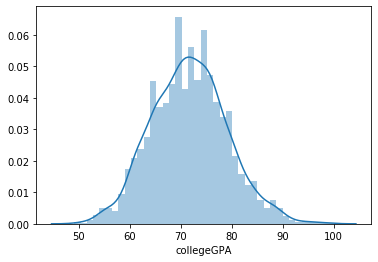

In [48]:
sns.distplot(df['collegeGPA'])

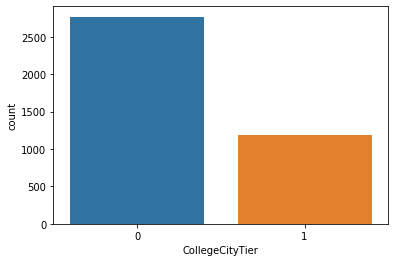

In [49]:
sns.countplot(df['CollegeCityTier'])

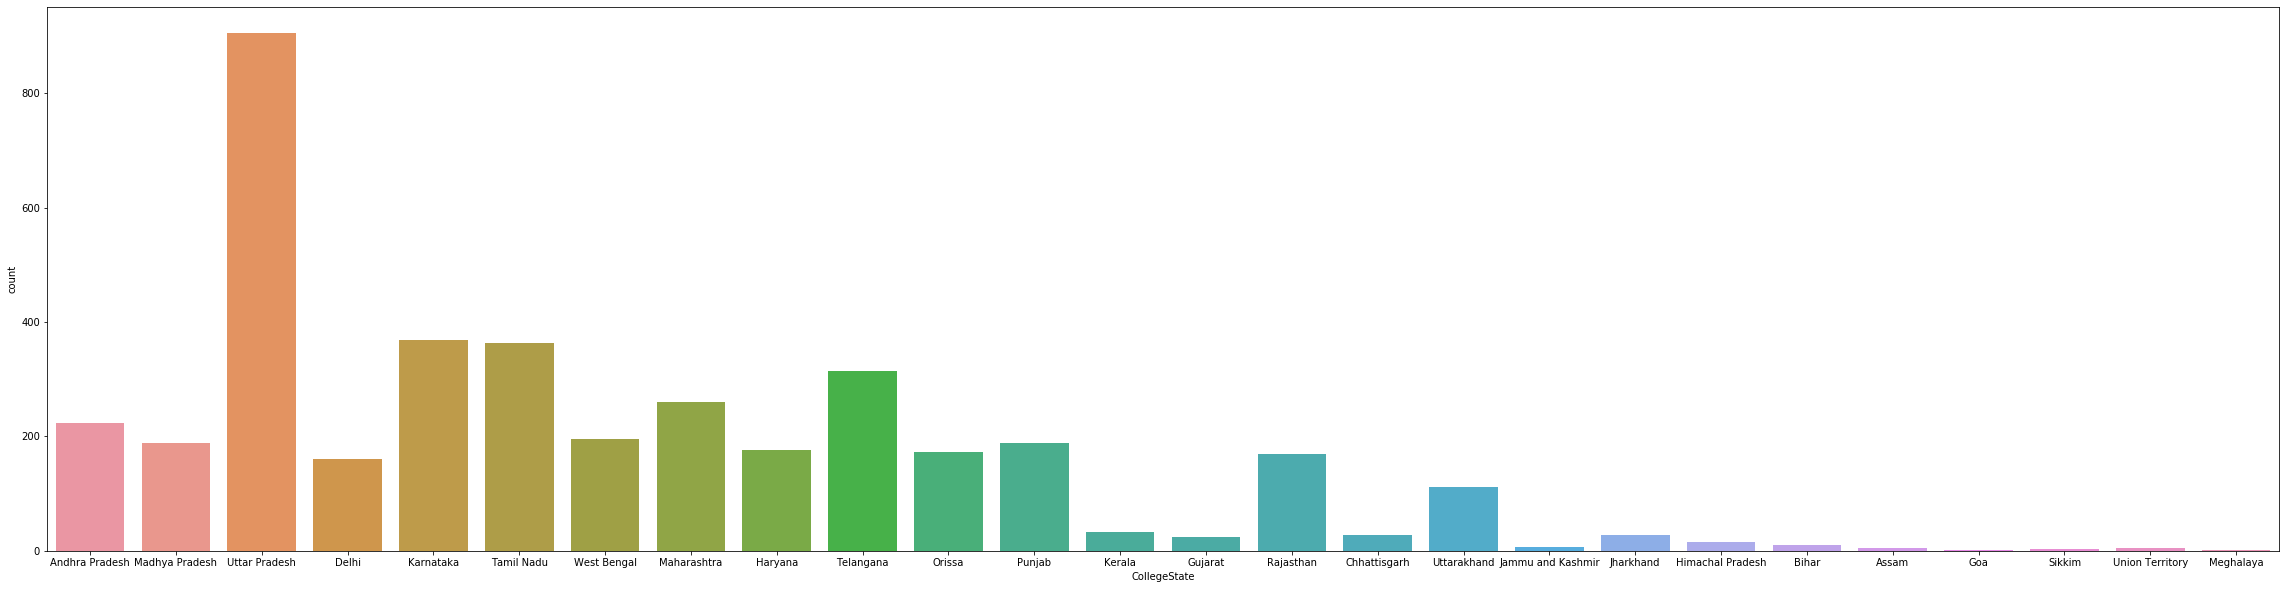

In [50]:
plt.figure(figsize=(40,10))
sns.countplot(df['CollegeState'])

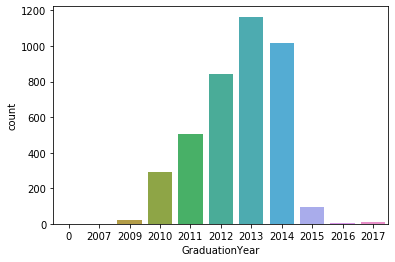

In [51]:
sns.countplot(df['GraduationYear'])

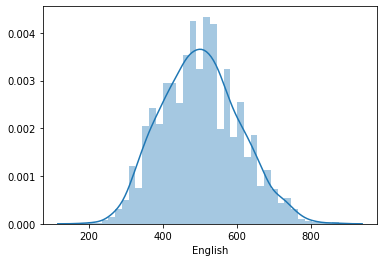

In [52]:
sns.distplot(df['English'])

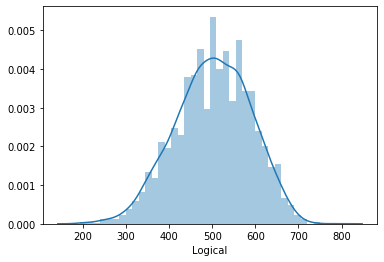

In [53]:
sns.distplot(df['Logical'])

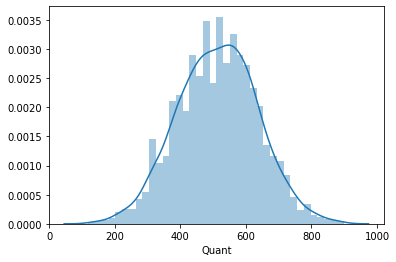

In [54]:
sns.distplot(df['Quant'])

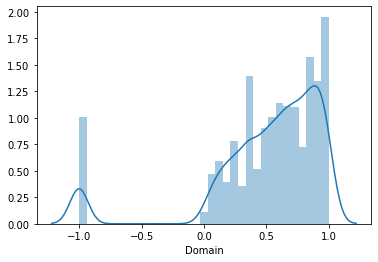

In [55]:
sns.distplot(df['Domain'])

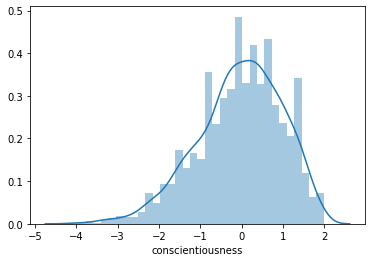

In [56]:
sns.distplot(df['conscientiousness'])

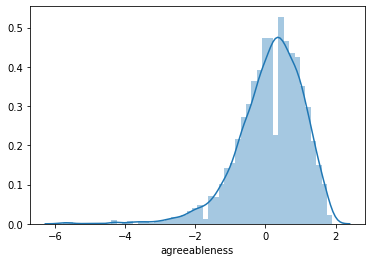

In [57]:
sns.distplot(df['agreeableness'])

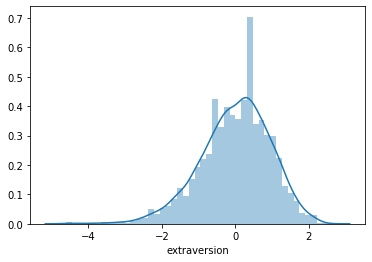

In [58]:
sns.distplot(df['extraversion'])

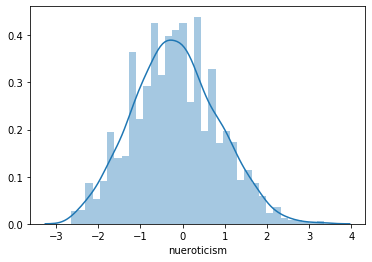

In [59]:
sns.distplot(df['nueroticism'])

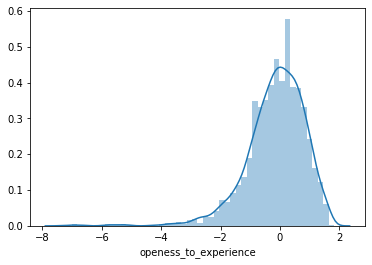

In [60]:
sns.distplot(df['openess_to_experience'])

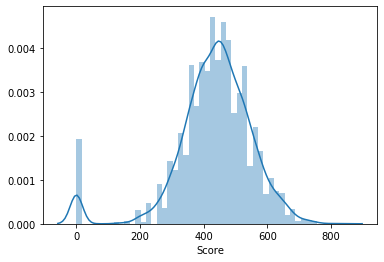

In [61]:
sns.distplot(df['Score'])

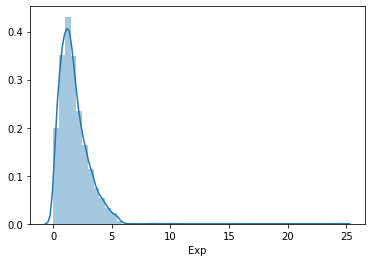

In [62]:
sns.distplot(df['Exp'])

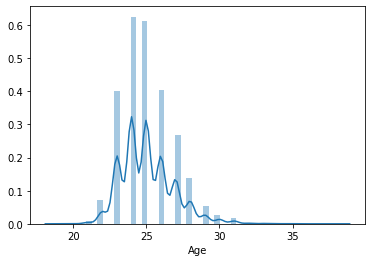

In [63]:
sns.distplot(df['Age'])

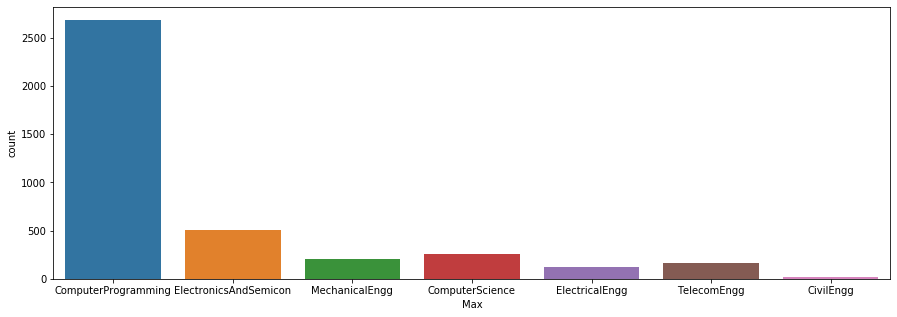

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(df['Max'])

# Bivariate:

In [65]:
#plt.figure(figsize=(25,5))
#sns.barplot(df['Designation'],df['Salary'],estimator=np.mean)

In [66]:
#sns.barplot(df['JobCity'],df['Salary'],estimator=np.mean)

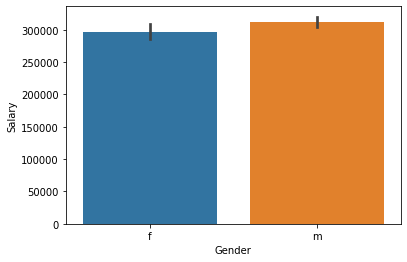

In [67]:
sns.barplot(df['Gender'],df['Salary'],estimator = np.mean)

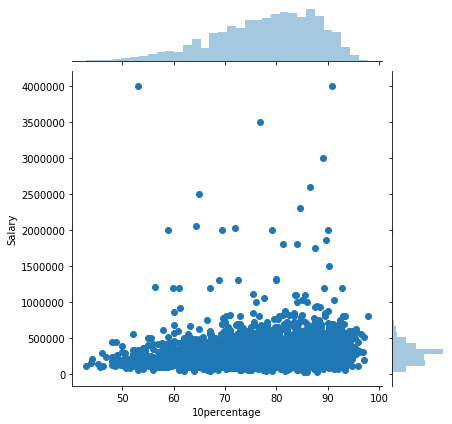

In [68]:
sns.jointplot(df['10percentage'],df['Salary'])

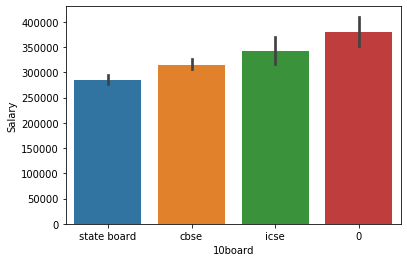

In [69]:
sns.barplot(df['10board'],df['Salary'],estimator=np.mean)

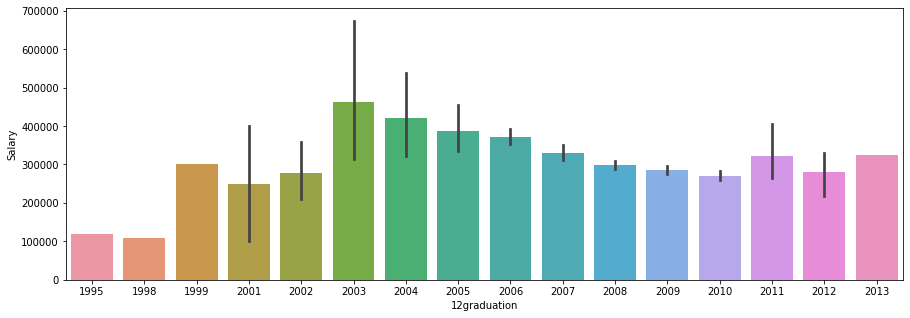

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(df['12graduation'],df['Salary'],estimator=np.mean)

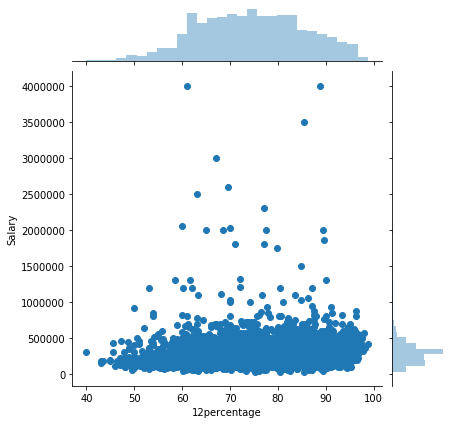

In [71]:
sns.jointplot(df['12percentage'],df['Salary'])

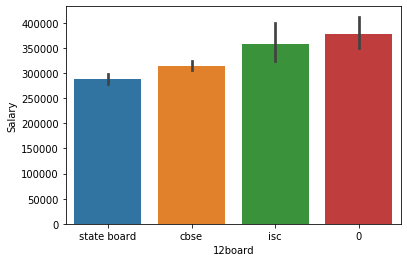

In [72]:
sns.barplot(df['12board'],df['Salary'],estimator=np.mean)

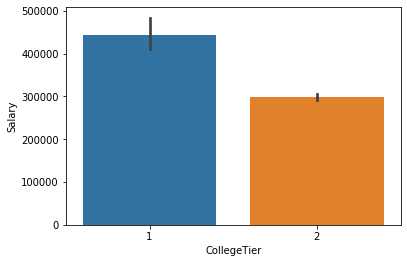

In [73]:
sns.barplot(df['CollegeTier'],df['Salary'],estimator=np.mean)

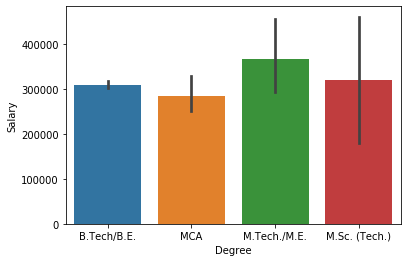

In [74]:
sns.barplot(df['Degree'],df['Salary'],estimator=np.mean)

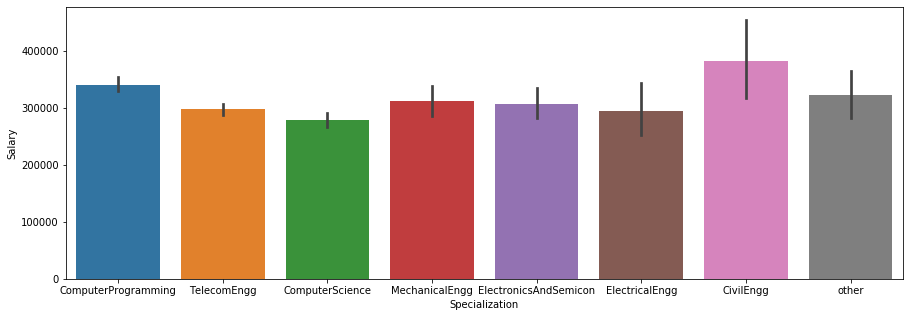

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(df['Specialization'],df['Salary'],estimator=np.mean)

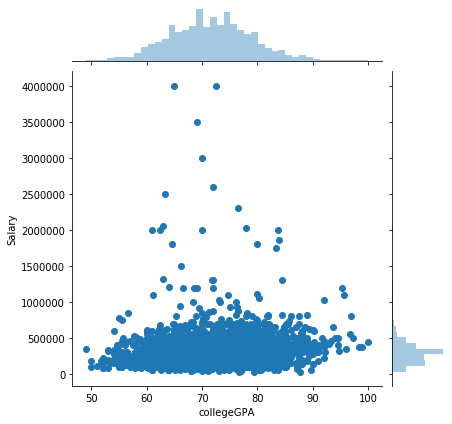

In [76]:
sns.jointplot(df['collegeGPA'],df['Salary'])

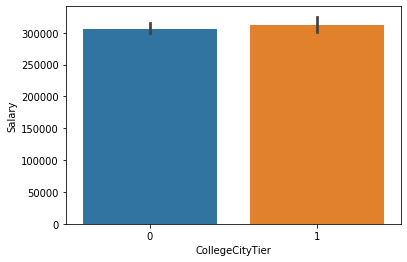

In [77]:
sns.barplot(df['CollegeCityTier'],df['Salary'],estimator = np.mean)

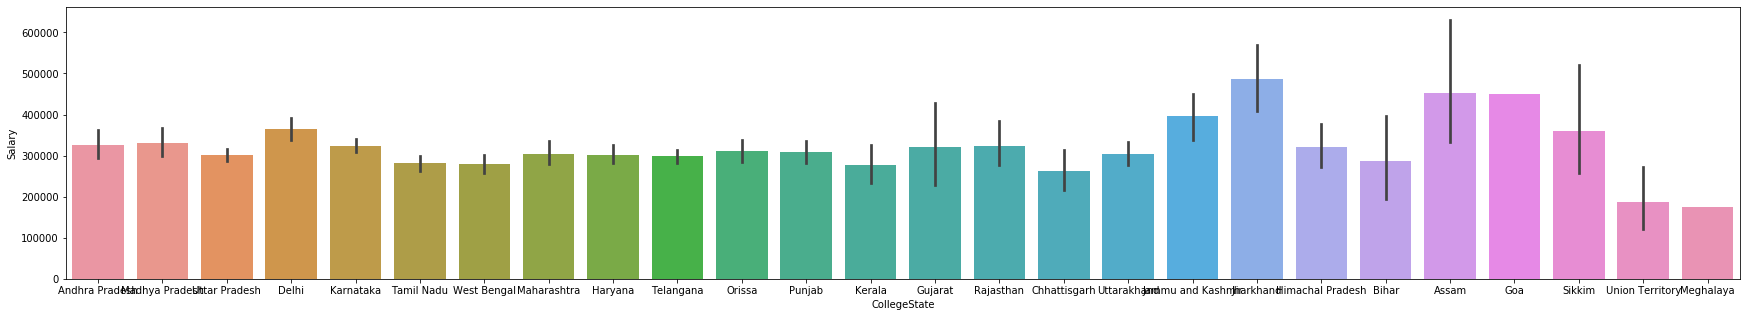

In [78]:
plt.figure(figsize=(30,5))
sns.barplot(df['CollegeState'],df['Salary'],estimator=np.mean)

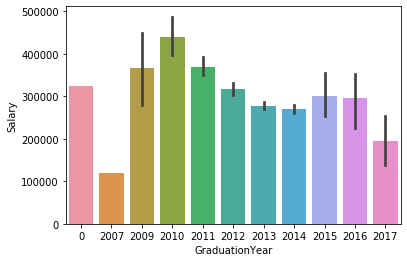

In [79]:
sns.barplot(df['GraduationYear'],df['Salary'],estimator=np.mean)

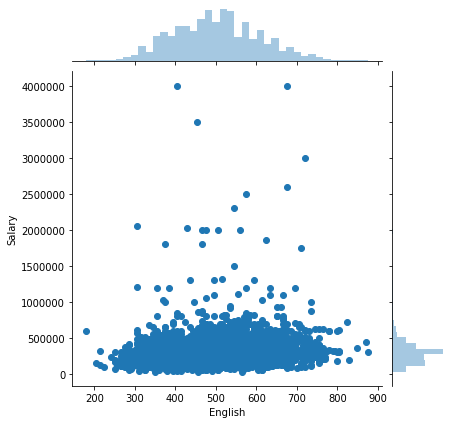

In [80]:
sns.jointplot(df['English'],df['Salary'])

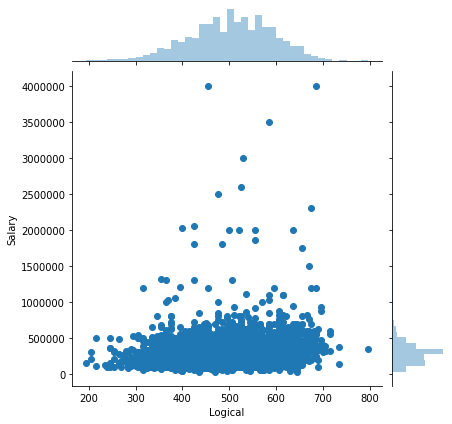

In [81]:
sns.jointplot(df['Logical'],df['Salary'])

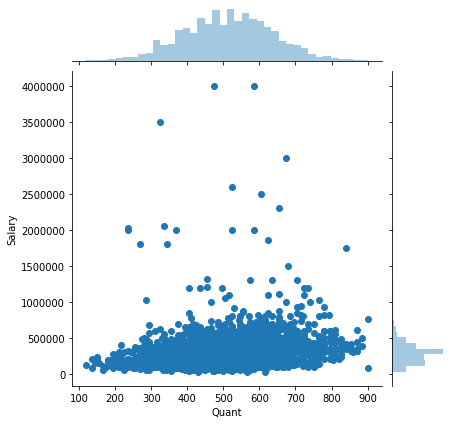

In [82]:
sns.jointplot(df['Quant'],df['Salary'])

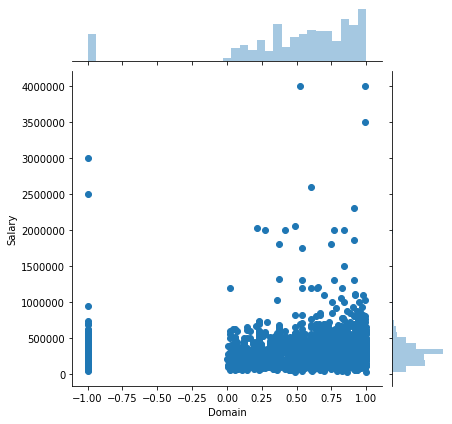

In [83]:
sns.jointplot(df['Domain'],df['Salary'])

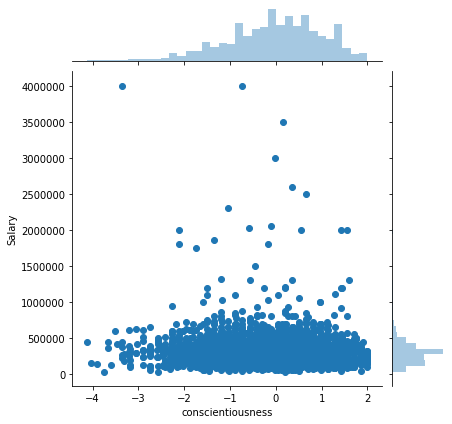

In [84]:
sns.jointplot(df['conscientiousness'],df['Salary'])

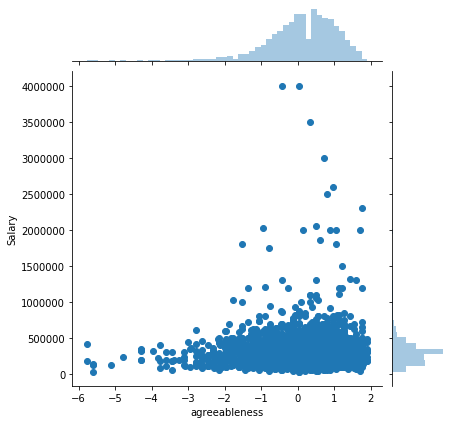

In [85]:
sns.jointplot(df['agreeableness'],df['Salary'])

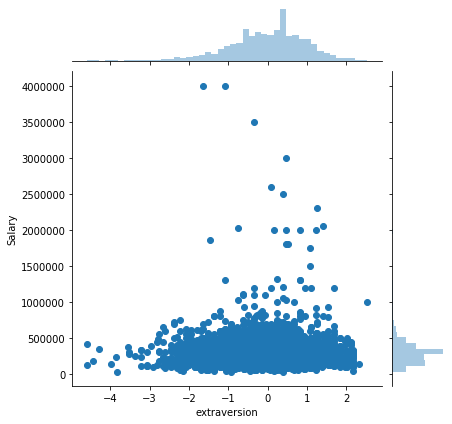

In [86]:
sns.jointplot(df['extraversion'],df['Salary'])

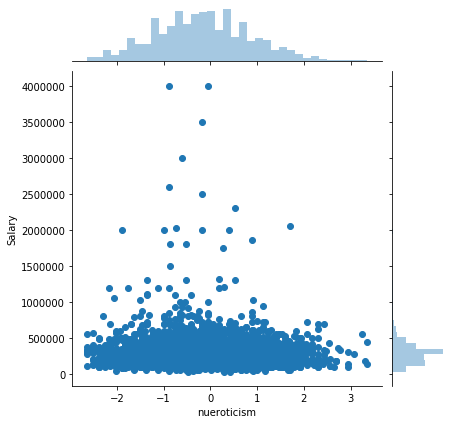

In [87]:
sns.jointplot(df['nueroticism'],df['Salary'])

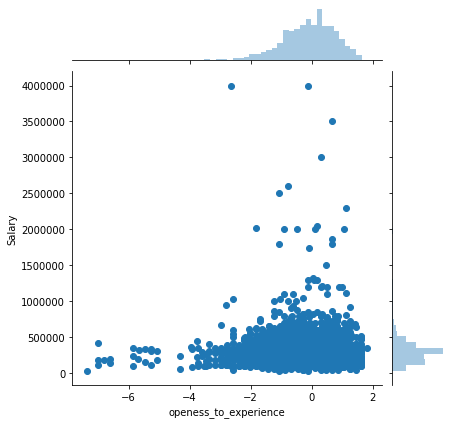

In [88]:
sns.jointplot(df['openess_to_experience'],df['Salary'])

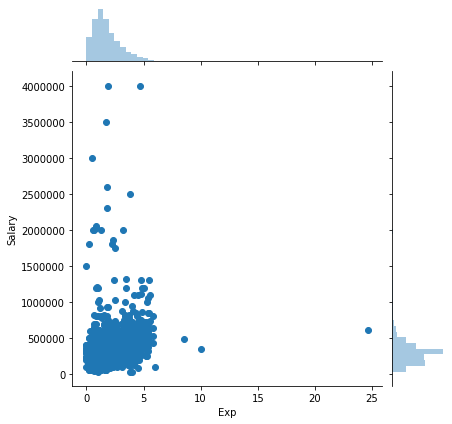

In [89]:
sns.jointplot(df['Exp'],df['Salary'])

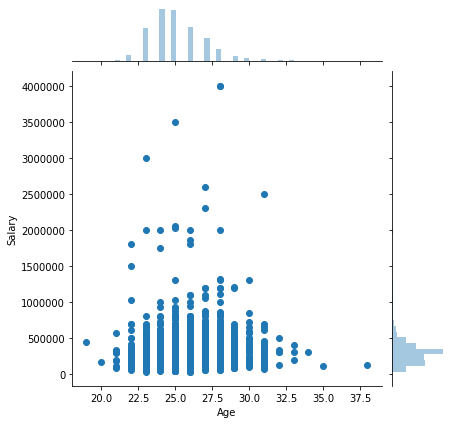

In [90]:
sns.jointplot(df['Age'],df['Salary'])

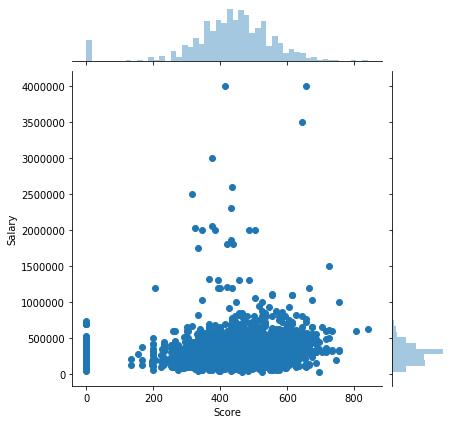

In [91]:
sns.jointplot(df['Score'],df['Salary'])

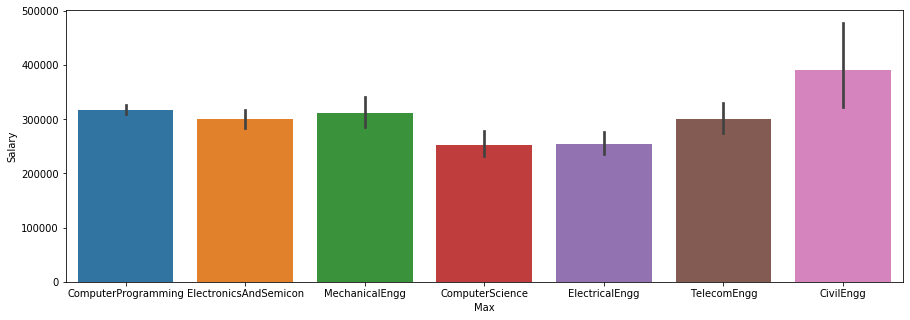

In [92]:
plt.figure(figsize=(15,5))
sns.barplot(df['Max'],df['Salary'],estimator=np.mean)

In [93]:
df['10board'].replace({0:np.NaN},inplace=True)
df['12board'].replace({0:np.NaN},inplace=True)
df['Domain'].replace({-1:np.NaN},inplace=True)
df['Score'].replace({0:np.NaN},inplace=True)
df['JobCity'].replace({-1:np.NaN},inplace=True)
df['GraduationYear'].replace({0:np.NaN},inplace=True)

In [94]:
df.isnull().sum()

Salary                     0
Designation                0
JobCity                  449
Gender                     0
10percentage               0
10board                  350
12graduation               0
12percentage               0
12board                  359
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityTier            0
CollegeState               0
GraduationYear             1
English                    0
Logical                    0
Quant                      0
Domain                   242
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Exp                        0
Age                        0
Score                    128
Max                        0
CP                         0
ES                         0
CS                         0
ME                         0
EE                         0
TE            

In [95]:
df['JobCity'].fillna(method='ffill',inplace=True)
df['10board'].fillna(method='ffill',inplace=True)
df['12board'].fillna(method='ffill',inplace=True)
df['Domain'].fillna(method='ffill',inplace=True)
df['Score'].fillna(method='ffill',inplace=True)
df['GraduationYear'].fillna(method='ffill',inplace=True)

In [96]:
df.shape

(3958, 36)

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Degree']=le.fit_transform(df['Degree'])
df['10board']=le.fit_transform(df['10board'])
df['12board']=le.fit_transform(df['12board'])
df['Designation'] = le.fit_transform(df['Designation'])
df['JobCity'] = le.fit_transform(df['JobCity'])
df['Specialization'] = le.fit_transform(df['Specialization'])
df['CollegeState'] = le.fit_transform(df['CollegeState'])
df['Max'] = le.fit_transform(df['Max'])

In [98]:
X = df.drop('Salary',axis=1)
y = df['Salary']

In [99]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     37.13
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          1.38e-203
Time:                        15:48:34   Log-Likelihood:                -53625.
No. Observations:                3958   AIC:                         1.073e+05
Df Residuals:                    3924   BIC:                         1.075e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.623e+07    6.4e+06      2.535      0.011    3.68e+06    2.88e+07
Designation             -17.1254     24.252     -0.706      0.480     -64.674      30.423
JobCity                -124.8474     64.857     -1.925      0.054    -252.004       2.309
Gender                 2.559e+04   7420.408      3.449      0.001     1.1e+04    4.01e+04
10percentage            996.5502    434.563      2.293      0.022     144.559    1848.541
10board               -1.188e+04   6094.482     -1.950      0.051   -2.38e+04      64.405
12graduation          -3262.0493   4621.304     -0.706      0.480   -1.23e+04    5798.334
12percentage            879.8790    391.712      2.246      0.025     111.900    1647.858
12board                5213.1374   6086.842      0.856      0.392   -6720.535    1.71e+04
CollegeTier           -8.387e+04   1.23e+04     -6.822      0.000   -1.08e+05   -5.98e+04
Degree                 -342.3693   5051.710     -0.068      0.946   -1.02e+04    9561.855
Specialization        -3343.0645   1901.156     -1.758      0.079   -7070.411     384.282
collegeGPA             1747.9682    477.298      3.662      0.000     812.194    2683.743
CollegeCityTier        -1.15e+04   6734.480     -1.708      0.088   -2.47e+04    1700.308
CollegeState             53.2783    437.957      0.122      0.903    -805.367     911.924
GraduationYear        -8478.0546   4774.829     -1.776      0.076   -1.78e+04     883.326
English                 150.0871     34.631      4.334      0.000      82.191     217.984
Logical                  75.3119     43.092      1.748      0.081      -9.174     159.797
Quant                    83.1089     31.554      2.634      0.008      21.245     144.972
Domain                 2.592e+04   1.67e+04      1.555      0.120   -6760.698    5.86e+04
conscientiousness     -1.025e+04   3601.444     -2.845      0.004   -1.73e+04   -3185.668
agreeableness          1.004e+04   4412.724      2.274      0.023    1384.797    1.87e+04
extraversion           9030.1503   3674.477      2.458      0.014    1826.085    1.62e+04
nueroticism           -6269.1633   3224.660     -1.944      0.052   -1.26e+04      53.005
openess_to_experience -8033.9277   3841.188     -2.092      0.037   -1.56e+04    -503.014
Exp                    5.645e+04   3053.912     18.484      0.000    5.05e+04    6.24e+04
Age                   -1377.4171   3538.943     -0.389      0.697   -8315.759    5560.925
Score                    62.3708     54.316      1.148      0.251     -44.119     168.860
Max                    1.674e+06   6.62e+05      2.529      0.011    3.76e+05    2.97e+06
CP                     5.657e+06   2.24e+06      2.528      0.012    1.27e+06       1e+07
ES                     6.324e+05   2.52e+05      2.507      0.012    1.38e+05    1.13e+06
CS                     

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Designation,1.043671
JobCity,1.039695
Gender,1.147351
10percentage,2.092049
10board,3.825362
12graduation,6.702304
12percentage,2.123555
12board,3.911378
CollegeTier,1.195531
Degree,1.622119
